
<h1>Perform Exploratory Data Analysis on the data set.</h1>



##  Download and Prep the Data

<h4>Import the libraries needed</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing 
from datetime import datetime
import dateutil.parser as dp
import calendar
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<h4> Load data and store in dataframe </h4>

In [2]:
dateparse = lambda x: dp.parse(x)
df = pd.read_csv('data.csv', parse_dates=['Date','Time'], date_parser=dateparse)
dfCopy=df.copy()
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = [time.time() for time in df['Time']]

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,costofgoodssold,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08:00,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29:00,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23:00,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33:00,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37:00,Ewallet,604.17,5.3


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [4]:
pd.set_option('display.max_columns', None)


In [5]:
cat_data=pd.get_dummies(df[["Branch","City","Gender","Customer type","Payment","Product line"]])
df=pd.concat([df, cat_data], axis=1)
df=df.drop(['Branch','City','Gender','Customer type','Payment',"Product line"],axis=1)
df.head()

,Invoice ID,Unit price,Quantity,Total,Date,Time,costofgoodssold,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Gender_Female,Gender_Male,Customer type_Member,Customer type_Normal,Payment_Cash,Payment_Credit card,Payment_Ewallet,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,750-67-8428,74.69,7,548.9715,2019-01-05,13:08:00,522.83,9.1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0
1,226-31-3081,15.28,5,80.2200,2019-03-08,10:29:00,76.40,9.6,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0
2,631-41-3108,46.33,7,340.5255,2019-03-03,13:23:00,324.31,7.4,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0
3,123-19-1176,58.22,8,489.0480,2019-01-27,20:33:00,465.76,8.4,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0
4,373-73-7910,86.31,7,634.3785,2019-02-08,10:37:00,604.17,5.3,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1


#### Display the summary statistics of the data.In a markdown cell below,explain your findings

In [6]:
df.describe()

,Unit price,Quantity,Total,costofgoodssold,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Gender_Female,Gender_Male,Customer type_Member,Customer type_Normal,Payment_Cash,Payment_Credit card,Payment_Ewallet,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,322.966749,307.58738,6.97270,0.340000,0.332000,0.32800,0.332000,0.32800,0.340000,0.501000,0.499000,0.501000,0.499000,0.344000,0.311000,0.345000,0.170000,0.178000,0.174000,0.152000,0.160000,0.166000
std,26.494628,2.923431,245.885335,234.17651,1.71858,0.473946,0.471167,0.46972,0.471167,0.46972,0.473946,0.500249,0.500249,0.500249,0.500249,0.475279,0.463134,0.475606,0.375821,0.382704,0.379299,0.359201,0.366789,0.372267
min,10.080000,1.000000,10.678500,10.17000,4.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.875000,3.000000,124.422375,118.49750,5.50000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.230000,5.000000,253.848000,241.76000,7.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.935000,8.000000,471.350250,448.90500,8.50000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.960000,10.000000,1042.650000,993.00000,10.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Identify whether male/female spends more on 'Health and beauty'.Write the code below

In [7]:
male=df[df['Gender_Male']==1]
print(f'Total no.of males in the given dataset: {male.shape[0]}')
maleHealthandBeautyCount=male[male['Product line_Health and beauty']==1].shape[0]
print(f'Count of males who spends on Health and beauty: {maleHealthandBeautyCount}')
female=df[df['Gender_Female']==1]
print(f'Total no.of females in the given dataset: {female.shape[0]}')
femaleHealthandBeautyCount=female[female['Product line_Health and beauty']==1].shape[0]
print(f'Count of females who spends on Health and beauty: {femaleHealthandBeautyCount}')
if(maleHealthandBeautyCount>femaleHealthandBeautyCount):
    print('****')
    print('In the given dataset male spends more on Health and beauty')
    print('****')
elif(femaleHealthandBeautyCount>maleHealthandBeautyCount):
    print('****')
    print('In the given dataset female spends more on Health and beauty')
    print('****')
else:
    print('****')
    print('In the given dateset both males and females spends equally')
    print('****')

Total no.of males in the given dataset: 499
Count of males who spends on Health and beauty: 88
Total no.of females in the given dataset: 501
Count of females who spends on Health and beauty: 64
****
In the given dataset male spends more on Health and beauty
****



<h2>Check the distribution of the Price variable .</h2>
   

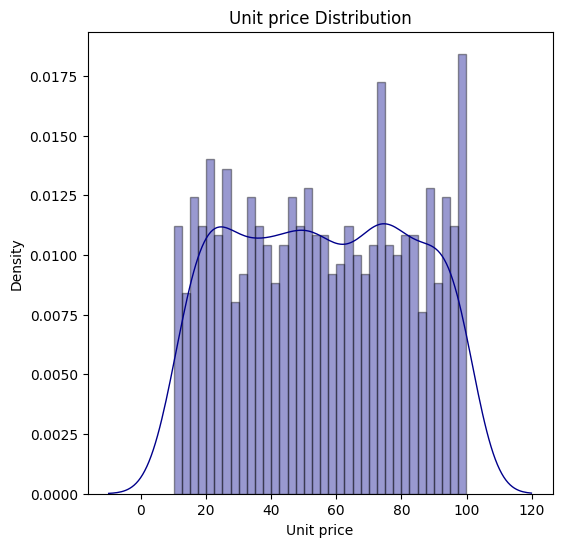

In [8]:
continuousDf=df.select_dtypes(include='number')
for column in continuousDf.columns:
    continuousDf[column] = (continuousDf[column] - continuousDf[column].min()) / (continuousDf[column].max() - continuousDf[column].min())    

plt.figure(figsize=(6,6))

sns.distplot(df['Unit price'],hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.title('Unit price Distribution')
plt.show()


<p>1. <strong>Summarization:</strong></p>
<ul>
<li>Products with prices below ten are not available</li>
<li>The most expensive product costs less than 100</li>
<li>A greater number of products are available between 87.5 and 100</li>
<li>It is between 85 and 87.5 that the least number of products are available</li>
</ul>
<p>2. <strong>Reason for selecting the chart type:</strong></p>
<ul>
<li>Unit Price data available is continuous and can be measured on an interval scale in the data set</li>
<li>The histogram is the best way to represent continuous data</li>
<li>Histograms illustrate the major features of the data distribution in an intuitive way</li>
<li>If the data contains outliers, we will detect them</li>
</ul>
<p>3. <strong>Pre-attentive attributes used:</strong></p>
<ul>
<li>Form</li>
<li>Color</li>
<li>Spatial Position</li>
</ul>
<p>4. <strong>Gestalt principles used:</strong></p>
<ul>
<li>Similarity</li>
<li>Continuation</li>
<li>Proximity</li>
</ul>


<h2>What does the distribution of customer rating looks like? Draw the mean,25th and 75th percentile on the plot.</h2>
    
   

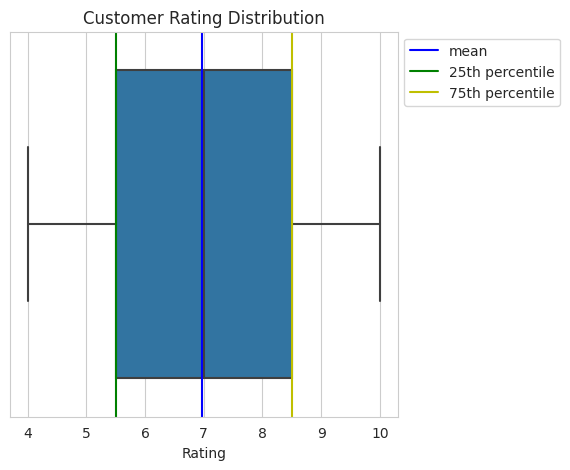

In [9]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.boxplot(x='Rating',data=df)
plt.axvline(x =df['Rating'].mean(0), color = 'b', label = 'mean')
plt.axvline(x =np.percentile(df['Rating'], 25), color = 'g', label = '25th percentile')
plt.axvline(x =np.percentile(df['Rating'], 75), color = 'y', label = '75th percentile')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Customer Rating Distribution')
plt.show()

<p>1. <strong>Summarization:</strong></p>
<p>Based on the plot, we can conclude that</p>
<ul>
<li>The median of the customer rating is 7</li>
<li>The mean of the customer rating is 6.9727(nearly 7)</li>
<li>The 25th percentile of the customer rating is 5.5</li>
<li>The 75th percentile of the customer rating is 8.5</li>
<li>Minimum customer rating is 4</li>
<li>Maximum customer rating is 10</li>
</ul>
<p>2. <strong>Reason for selecting the chart type:</strong></p>
<ul>
<li>Box plots are the best way to find and draw mean,25th and 75th percentiles</li>
<li>The box plot illustrates how numerical data is distributed and skewness by displaying the data quartiles (or percentiles) and averages.</li>
<li>Box plots shows the five-number summary of a series of data, including the minimum score, the first (lower) quartile, median, the third (upper) quartile, and the maximum score.</li>
<li>Box plots are useful as they show outliers within a data set.</li>
</ul>
<p>3. <strong>Pre-attentive attributes used:</strong></p>
<ul>
<li>Form</li>
<li>Color</li>
<li>Spatial Position</li>
</ul>
<p>4. <strong>Gestalt principles used:</strong></p>
<ul>
<li>Similarity</li>
<li>Continuation</li>
<li>Proximity</li>
<li>Symmetry</li>
</ul>


<h2>For each payment method,compare the product lines. Does any stand out?</h2>
    

    

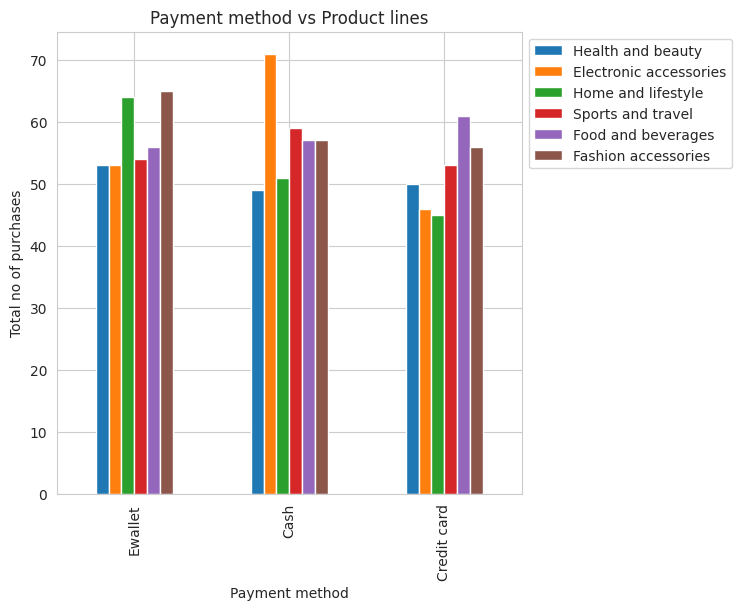

In [10]:
productLines=dfCopy['Product line'].unique()
paymentTypes=dfCopy['Payment'].unique()
paymentDf=pd.DataFrame()
paymentDf['Payment method']=paymentTypes

for index,productLine in enumerate(productLines):
    noOfPayments=[]
    for ind,paymentType in enumerate(paymentTypes):        
        noOfPayments.append(dfCopy[dfCopy['Product line'].isin([productLine]) & dfCopy['Payment'].isin([paymentType])].shape[0])
    paymentDf[productLine]=noOfPayments

paymentDf.plot(kind='bar',x='Payment method',y=productLines,figsize=(6,6),ylabel='Total no of purchases',title='Payment method vs Product lines').legend(bbox_to_anchor=(1.0, 1.0))
plt.show()
    

<p>1. <strong>Summarization:</strong></p>
<p>Based on the plot, we can conclude that</p>
<ul>
<li>The majority of people used Ewallets to purchase Health and beauty products</li>
<li>Electronic accessories were the most popular products purchased with cash</li>
<li>People mostly used Ewallets to buy Home and lifestyle products</li>
<li>Cash was the most common method of payment for Sports and Travel products</li>
<li>In most cases, people used their Credit cards to buy Food and beverages</li>
<li>Most people used Ewallet to buy Fashion accessories</li>
</ul>
<p>2. <strong>Reason for selecting the chart type:</strong></p>
<ul>
<li>We wanted to compare between values of different categories in the data and bar plots are often used for this scenario</li>
<li>Bar chart illustrate comparisons between discrete categories</li>
<li>In the plot, one axis represents the specific categories being compared and the other axis represents the measured values that correspond to those categories</li>
<li>Counts of each category were calculated in order to create a bar plot</li>
</ul>
<p>3. <strong>Pre-attentive attributes used:</strong></p>
<ul>
<li>Form</li>
<li>Color</li>
<li>Spatial Position</li>
</ul>
<p>4. <strong>Gestalt principles used:</strong></p>
<ul>
<li>Similarity</li>
<li>Continuation</li>
<li>Proximity</li>
<li>Symmetry</li>
</ul>


<h2>Identify, which is the most appropriate time(hour) to give online disount?</h2>

<AxesSubplot:title={'center':'Time Distribution'}, xlabel='Time', ylabel='Total Cost'>

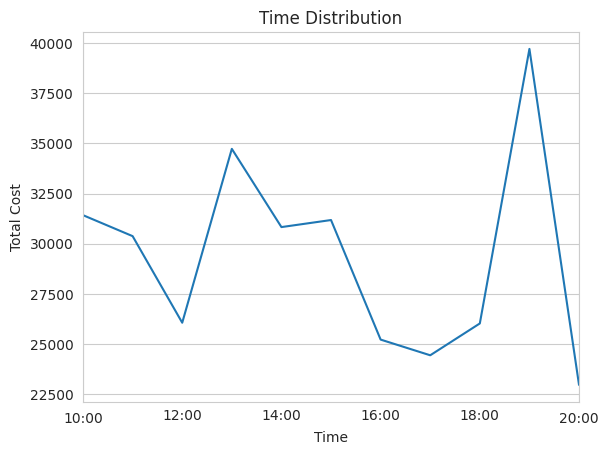

In [11]:
timeSeries=dfCopy.resample('H', on='Time')['Total'].sum()
plt.title('Time Distribution')
plt.ylabel('Total Cost')
plt.xlabel('Time')
timeSeries.plot()

<p>1. <strong>Summarization:</strong></p>
<ul>
<li>20:00 is the appropriate hour to give online discount</li>
<li>19:00 was the busiest time for sales</li>
<li>on 17:00, we can even consider giving some discounts</li>
</ul>
<p>2. <strong>Reason for selecting the chart type:</strong></p>
<ul>
<li>We wanted to compare between values of different hours in the data and line charts can be used for this scenario.</li>
<li>Line chart illustrate comparisons between different hours</li>
<li>Line Charts are used to represent the relation between two data X and Y on a different axis</li>
</ul>
<p>3. <strong>Pre-attentive attributes used:</strong></p>
<ul>
<li>Form</li>
<li>Color</li>
<li>Spatial Position</li>
</ul>
<p>4. <strong>Gestalt principles used:</strong></p>
<ul>
<li>Similarity</li>
<li>Continuation</li>
<li>Proximity</li>
<li>Symmetry</li>
</ul>

<h2>Which product line is more profitable?</h2>
    

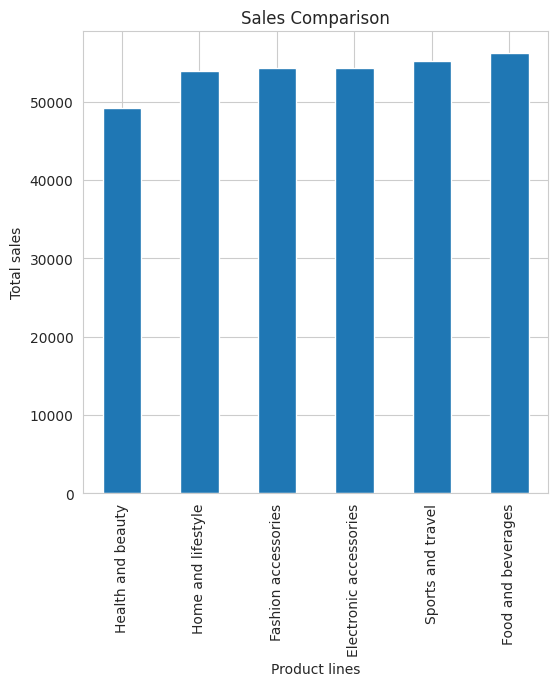

In [12]:
totalSales=[]
productSalesDf=pd.DataFrame()
productSalesDf['Product lines']=productLines
for index,productLine in enumerate(productLines):
    val=dfCopy[dfCopy['Product line'].isin([productLine])]['Total'].sum()
    totalSales.append(val)
productSalesDf['Total sales']=totalSales
productSalesDf=productSalesDf.sort_values('Total sales', ascending=True)
productSalesDf.plot(kind='bar',x='Product lines',y='Total sales',figsize=(6,6),title='Sales Comparison',ylabel='Total sales',legend=False)
plt.show()

<p>1. <strong>Summarization:</strong></p>
<p>Based on the plot, we can conclude that</p>
<ul>
<li>As a result of the higher sales of the food and beverages product line, it is more profitable</li>
<li>Sales of Health and beauty products are lower</li>
</ul>
<p>2. <strong>Reason for selecting the chart type:</strong></p>
<ul>
<li>We wanted to compare between values of different categories in the data and bar plots are often used for this scenario</li>
<li>The bar chart illustrates comparisons between discrete categories</li>
<li>In the plot, one axis represents the specific categories being compared and the other axis represents the measured values that correspond to those categories</li>
<li>In order to create a bar plot, counts were calculated of each category&nbsp;&nbsp;</li>
</ul>
<p>3. <strong>Pre-attentive attributes used:</strong></p>
<ul>
<li>Form</li>
<li>Color</li>
<li>Spatial Position</li>
</ul>
<p>4. <strong>Gestalt principles used:</strong></p>
<ul>
<li>Similarity</li>
<li>Continuation</li>
<li>Proximity</li>
<li>Symmetry</li>
<li>Order</li>
</ul>

<h2> Among all the years in the given data set, what month has the most sales?</h2>

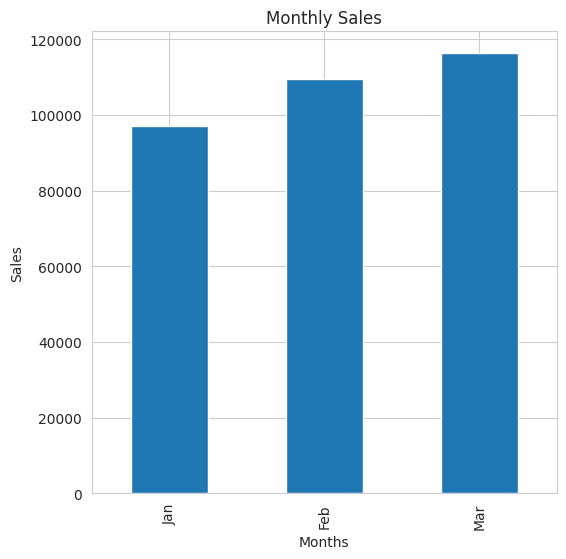

In [13]:

monthProfitsDf=pd.DataFrame()
monthList=[]
monthSalesList=[]
newMonthList=[]
for index,dt in enumerate(df.Date.tolist()):
    dtMonth=dt.month
    if (dtMonth in monthList):
        pass
    else:
        monthList.append(dtMonth)
monthList.sort()
totalColumnIndex=df.columns.get_loc("Total")
dateColumnIndex=df.columns.get_loc("Date")
rows=df.shape[0]
for index,mon in enumerate(monthList):
    monthProfit=0
    for row in range(rows):
        totalValue=df.iat[row,totalColumnIndex]
        dateValue=df.iat[row,dateColumnIndex]
        if(mon == dateValue.month):
            monthProfit=monthProfit+totalValue
    monthSalesList.append(monthProfit)
monthProfitsDf['Sales']=monthSalesList
monthProfitsDf=monthProfitsDf.sort_values('Sales',ascending=True)
newMonthList=[calendar.month_abbr[month] for month in monthList]
monthProfitsDf['Months']=newMonthList
monthProfitsDf.plot(kind='bar',x='Months',y='Sales',figsize=(6,6),title='Monthly Sales',legend=False,ylabel='Sales')
plt.show()


<p>1. <strong>Summarization:</strong></p>
<p>Based on the plot, we can conclude that</p>
<ul>
<li>There are only three months in the dataset</li>
<li>A higher level of sales was recorded in March</li>
<li>There were fewer sales in January</li>
</ul>
<p>2. <strong>Reason for selecting the chart type:</strong></p>
<ul>
<li>We wanted to compare between values of different categories in the data and bar plots are often used for this scenario</li>
<li>Bar chart illustrate comparisons between discrete categories</li>
<li>In the plot, one axis represents the specific categories being compared and the other axis represents the measured values that correspond to those categories</li>
<li>Counts of each category were calculated in order to create a bar plot</li>
</ul>
<p>3. <strong>Pre-attentive attributes used:</strong></p>
<ul>
<li>Form</li>
<li>Color</li>
<li>Spatial Position</li>
</ul>
<p>4. <strong>Gestalt principles used:</strong></p>
<ul>
<li>Similarity</li>
<li>Continuation</li>
<li>Proximity</li>
<li>Symmetry</li>
<li>Order</li>
</ul>